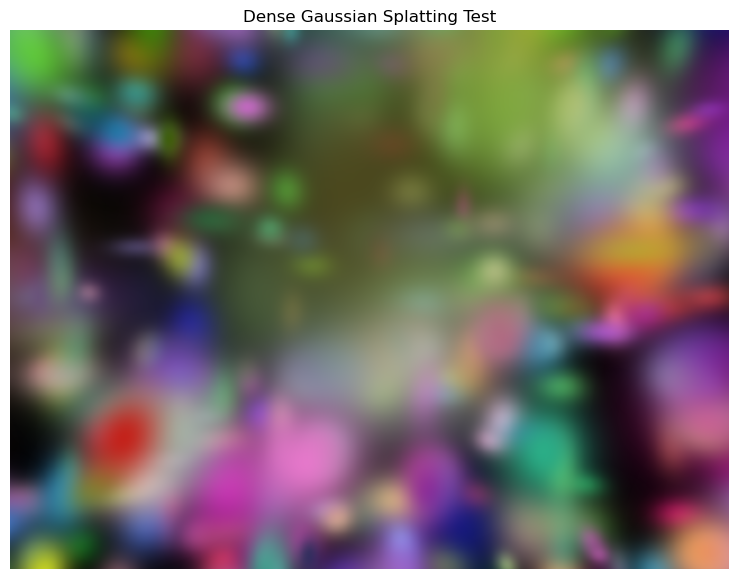

In [ ]:
import torch
from gsplat import rendering
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# CONFIG
# -----------------------------
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
H, W = 480, 640

# -----------------------------
# DENSE GAUSSIANS
# -----------------------------
N = 5000  # number of Gaussians

# Random positions in a cube [-1, 1]
means = (torch.rand(N, 3, device=DEVICE) - 0.5) * 2.0

# Random colors
colors = torch.rand(N, 3, device=DEVICE)

# Small random scales (size of each Gaussian)
scales = torch.rand(N, 3, device=DEVICE) * 0.02 + 0.01

# Opacity for each Gaussian
opacity = torch.rand(N, device=DEVICE) * 0.5 + 0.5  # 0.5 ~ 1.0

# Identity rotations
quats = torch.zeros(N, 4, device=DEVICE)
quats[:, 0] = 1.0

# -----------------------------
# CAMERA
# -----------------------------
fx, fy = 525.0, 525.0
cx, cy = W/2, H/2

T_wc = torch.eye(4, device=DEVICE).unsqueeze(0)  # [1,4,4]
Ks = torch.tensor(
    [[fx, 0, cx],
     [0, fy, cy],
     [0, 0, 1]],
    device=DEVICE
).unsqueeze(0)

# -----------------------------
# RENDER
# -----------------------------
image, depth, meta = rendering.rasterization(
    means=means,
    quats=quats,
    scales=scales,
    opacities=opacity,
    colors=colors,
    viewmats=T_wc,
    Ks=Ks,
    width=W,
    height=H,
    render_mode="RGB"
)

# -----------------------------
# PLOT IMAGE
# -----------------------------
image_np = image.squeeze(0).detach().cpu().numpy()
image_np = np.clip(image_np, 0.0, 1.0)

plt.figure(figsize=(10, 7))
plt.imshow(image_np)
plt.axis("off")
plt.title("Dense Gaussian Splatting Test")
plt.show()
